In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('prepd-data-20y.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region
0,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
1,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,None,China
2,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,None,China
3,4639,Ao Changrong,M,25.0,173.0,71.0,China,CHN,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,None,China
4,6376,Ba Dexin,M,23.0,185.0,80.0,China,CHN,2014,Winter,Sochi,Curling,Curling Men's Curling,None,China


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49399 entries, 0 to 49398
Data columns (total 15 columns):
ID        49399 non-null int64
Name      49399 non-null object
Sex       49399 non-null object
Age       49399 non-null float64
Height    49399 non-null float64
Weight    49399 non-null float64
Team      49399 non-null object
NOC       49399 non-null object
Year      49399 non-null int64
Season    49399 non-null object
City      49399 non-null object
Sport     49399 non-null object
Event     49399 non-null object
Medal     49399 non-null object
Region    49399 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 5.7+ MB


In [4]:
df = df.loc[df.Year==2016, ['Sex', 'Age', 'Height', 'Weight', 'Team', 'Sport', 'Medal']]
print(df.shape)
x = df[df.columns[:-1]].values
y = df['Medal'].values

le_indices = [0, 4, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x_std[:10])
print(y[:10])

ley_name_mapping = dict(zip(classes, ley.transform(classes)))
print(ley_name_mapping)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

(13656, 7)
[[-1.09613658 -2.19505001 -0.70132009 -1.08233807 -0.96639243  0.91201791]
 [-1.09613658 -2.19505001 -0.70132009 -1.08233807 -0.96639243  0.91201791]
 [ 0.91229507  0.68084207 -0.26274621 -0.31515645 -0.96639243  1.51731129]
 [-1.09613658 -0.75710397 -0.26274621 -1.01840626 -0.96639243  0.40760676]
 [ 0.91229507  0.14161231  0.61440154  1.02741139 -0.96639243  1.92084021]
 [-1.09613658 -0.57736071  0.52668677  2.81750183 -0.96639243 -1.30739115]
 [ 0.91229507 -0.2178742  -0.08731666 -1.01840626 -0.96639243 -1.30739115]
 [-1.09613658 -0.39761746 -0.08731666 -0.05942924 -0.96639243 -1.40827338]
 [-1.09613658 -0.39761746 -0.08731666 -0.05942924 -0.96639243 -1.40827338]
 [ 0.91229507 -0.39761746  0.35125722  0.38809337 -0.96639243 -1.30739115]]
[2 2 2 2 2 2 3 2 2 2]
{'Bronze': 0, 'Gold': 1, 'None': 2, 'Silver': 3}


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
df = pd.DataFrame(x_std, columns=['Sex', 'Age', 'Height', 'Weight', 'Team', 'Sport'])
df['Medal'] = y
df.head()

,Sex,Age,Height,Weight,Team,Sport,Medal
0,-1.096137,-2.195050,-0.701320,-1.082338,-0.966392,0.912018,2
1,-1.096137,-2.195050,-0.701320,-1.082338,-0.966392,0.912018,2
2,0.912295,0.680842,-0.262746,-0.315156,-0.966392,1.517311,2
3,-1.096137,-0.757104,-0.262746,-1.018406,-0.966392,0.407607,2
4,0.912295,0.141612,0.614402,1.027411,-0.966392,1.920840,2


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


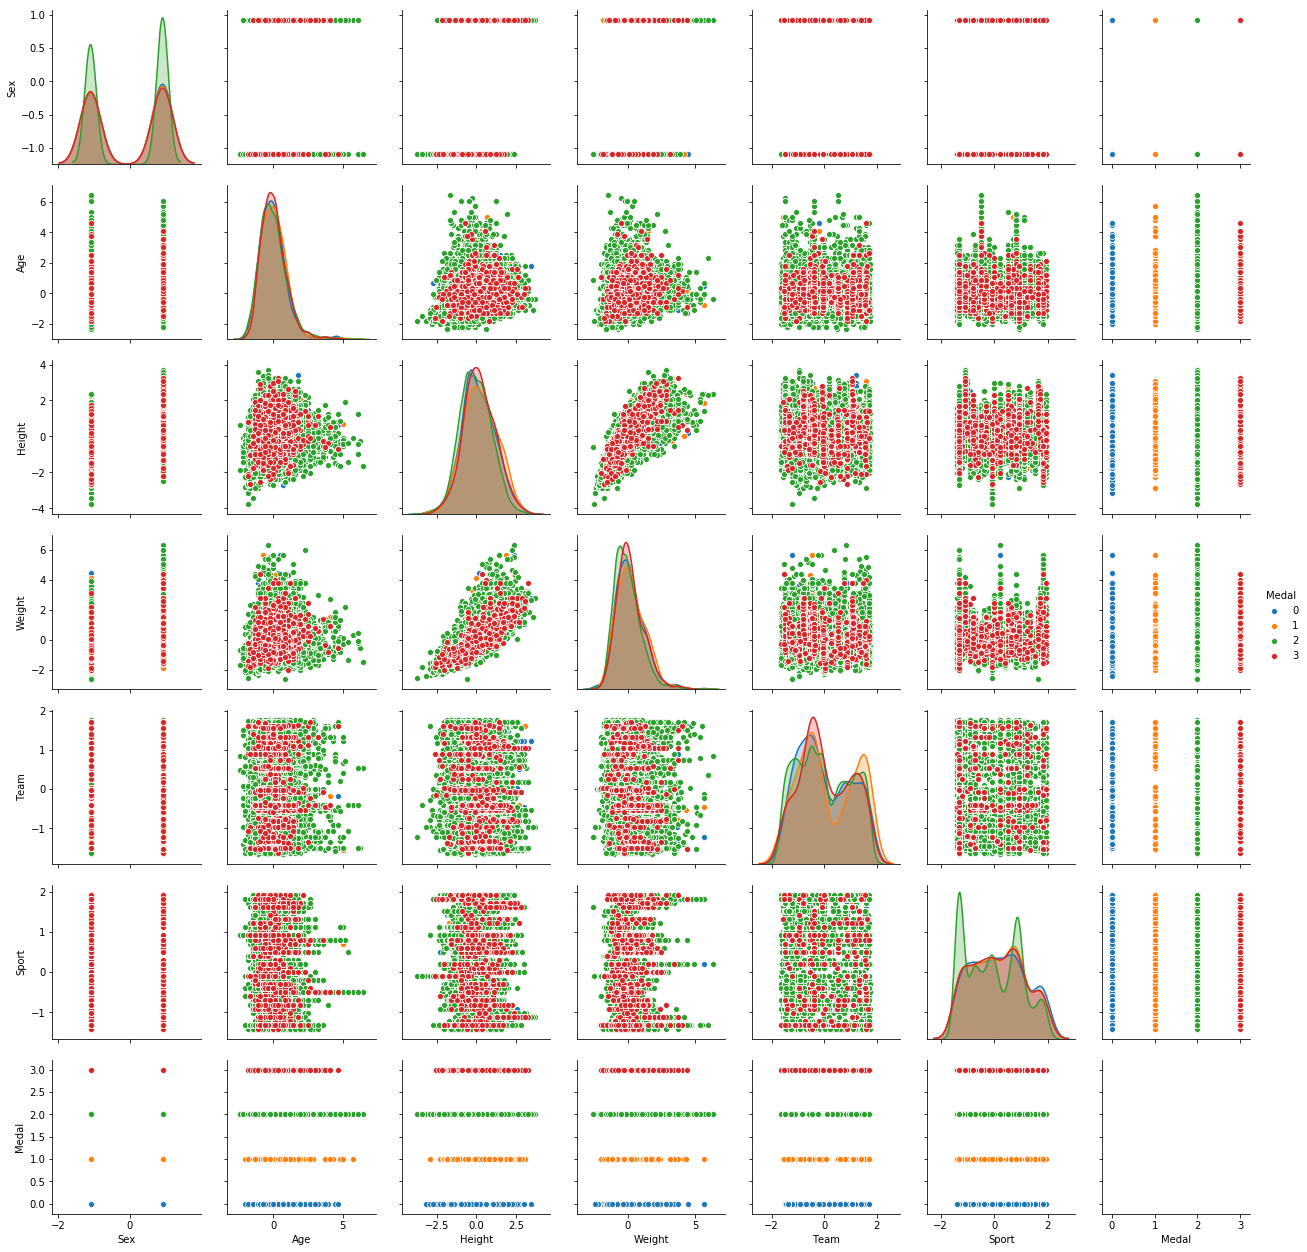

In [7]:
sb.pairplot(df, hue='Medal')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


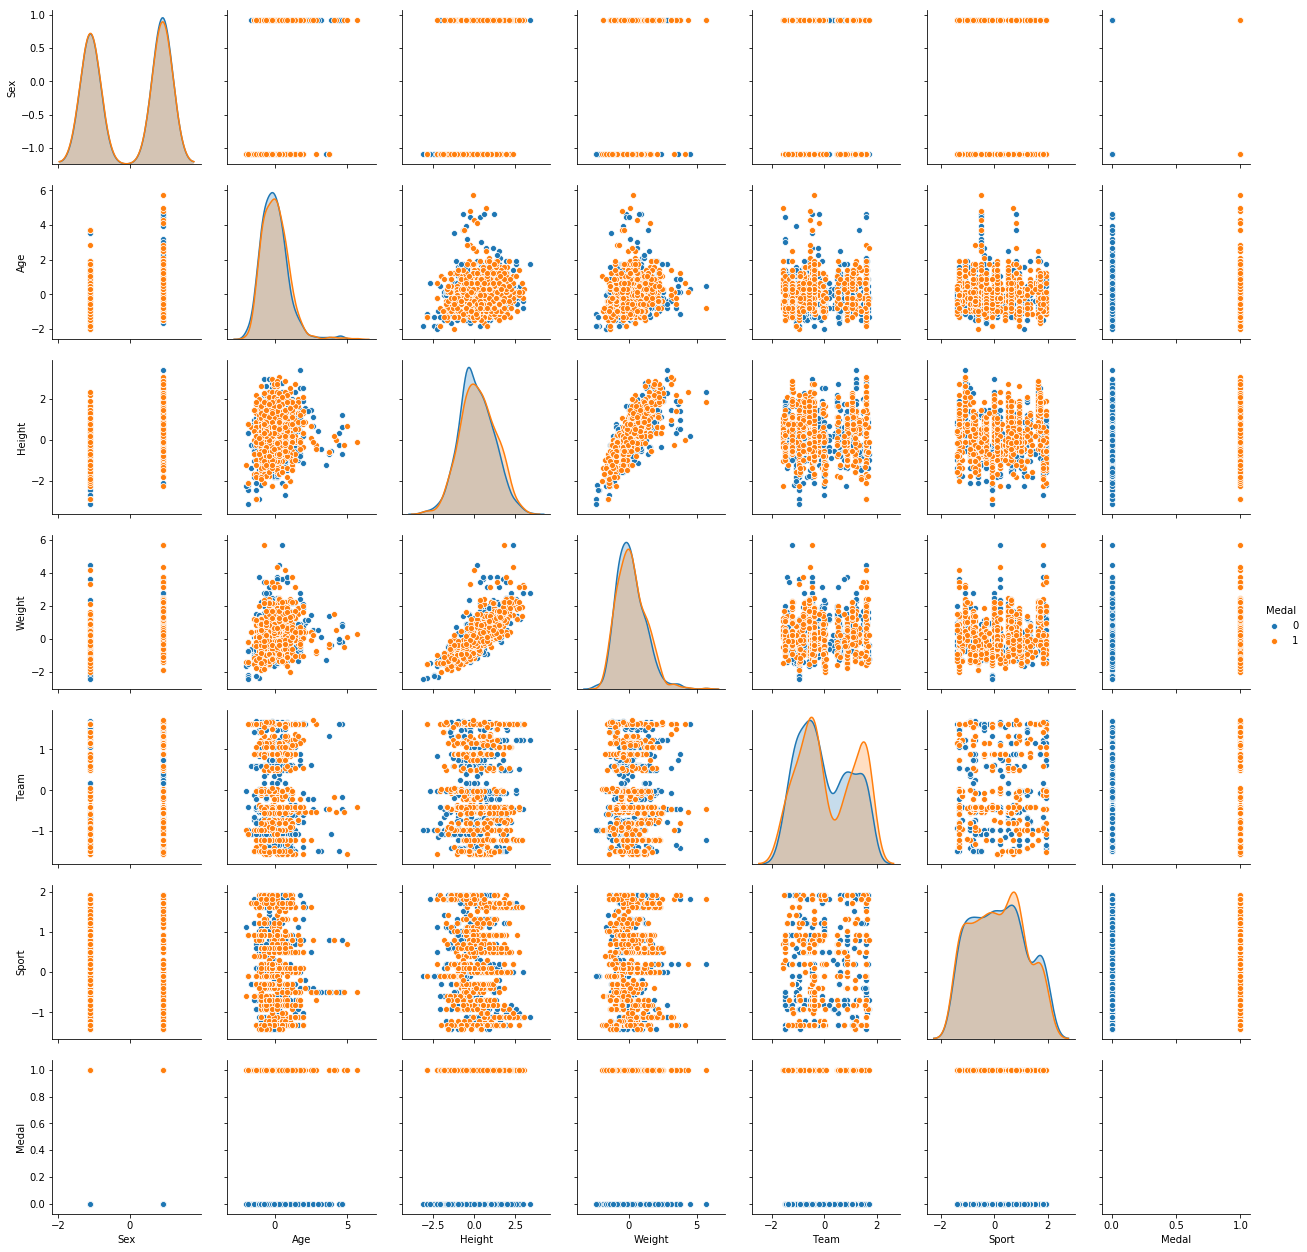

In [8]:
sb.pairplot(df.loc[~df.Medal.isin([2,3])], hue='Medal')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


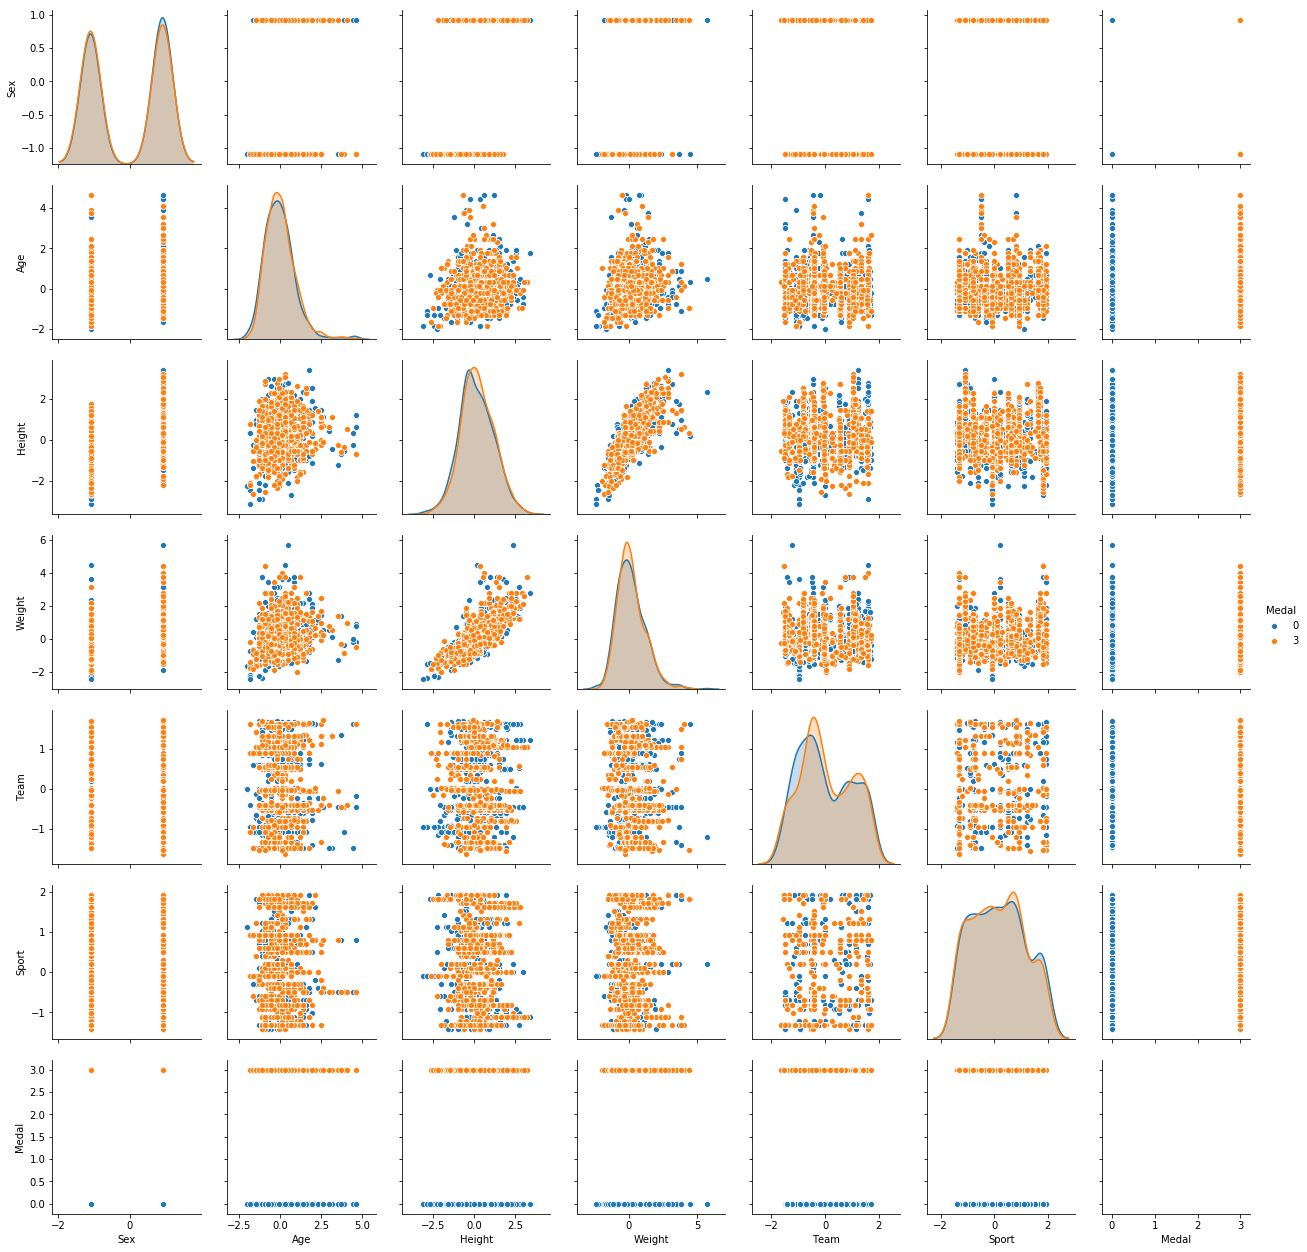

In [9]:
sb.pairplot(df.loc[~df.Medal.isin([2,1])], hue='Medal')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


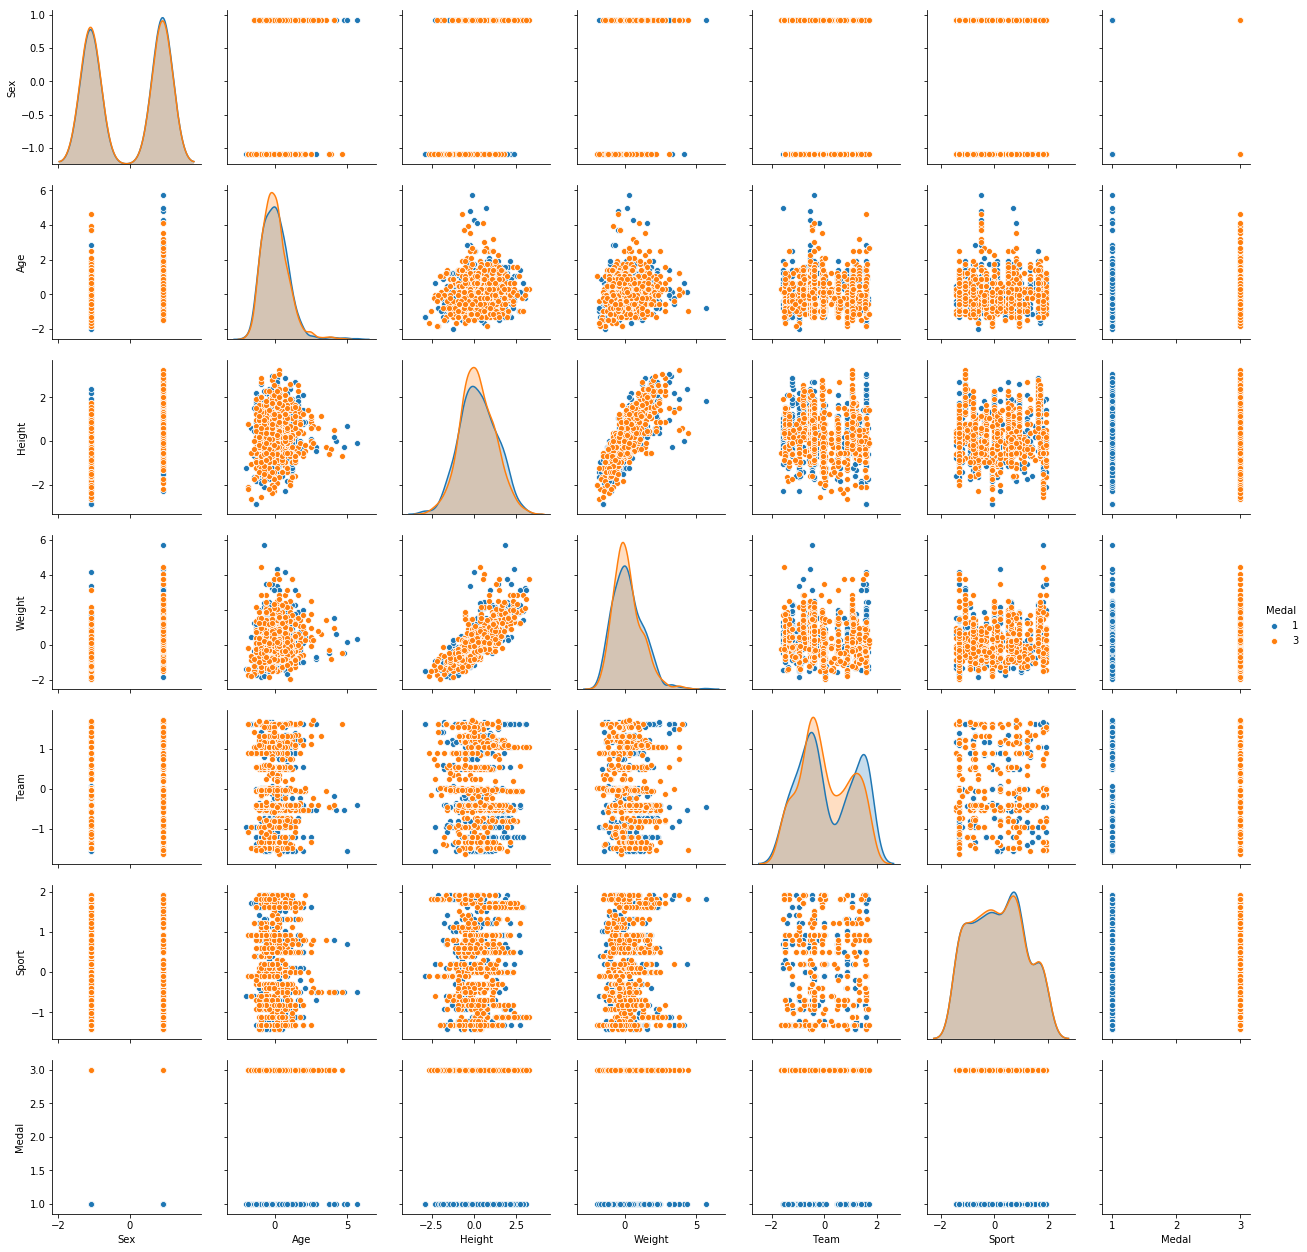

In [10]:
sb.pairplot(df.loc[~df.Medal.isin([2,0])], hue='Medal')

In [11]:
df_temp = df.loc[~df.Medal.isin([2,3])]

x = df_temp[['Sport', 'Team']].values
y = df_temp['Medal'].values

print(x[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

[[-0.60121554 -0.96639243]
 [-0.60121554 -0.96639243]
 [-0.60121554 -0.96639243]
 [-0.60121554 -0.96639243]
 [-1.20650892 -0.96639243]
 [-0.60121554 -0.96639243]
 [ 0.2058423  -0.96639243]
 [-0.09680439 -0.96639243]
 [ 1.81995798 -0.96639243]
 [ 1.11378237 -0.96639243]]
[1 0 1 1 1 1 0 0 1 1]


In [12]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
#     x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [13]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
        
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    #plot decision boundaries and margins
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,-1],
                   s=300,linewidth=1,facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [14]:
from sklearn.svm import SVC
from sklearn.svm import SVR

c = np.array([0.1, 1.0, 10])
gamma = np.array([0.1, 1.0, 10])

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Accuracy: 0.562


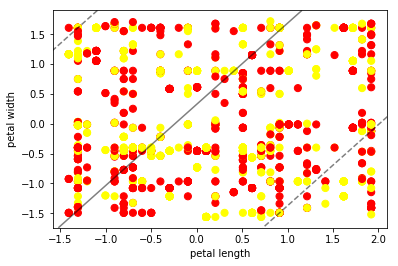

CPU times: user 836 ms, sys: 123 ms, total: 959 ms
Wall time: 484 ms


In [14]:
%%time
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
# print(dir(svm))
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [15]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c))
grid.fit(x, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,0.009816,0.002924,0.525595,0.494514,3
1,1,0.010440,0.002693,0.522671,0.501097,1
2,10,0.025465,0.002591,0.522671,0.501097,1


Accuracy: 0.560


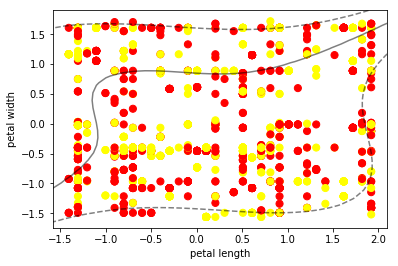

CPU times: user 693 ms, sys: 146 ms, total: 839 ms
Wall time: 285 ms


In [15]:
%%time
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')   
plt.show()

In [ ]:
# grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
# grid.fit(x, y)
# grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
# grid_data.head(10)

Accuracy: 0.603


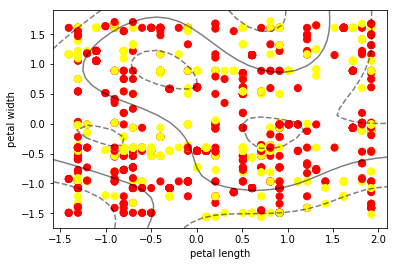

CPU times: user 727 ms, sys: 157 ms, total: 884 ms
Wall time: 302 ms


In [16]:
%%time
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')   
plt.show()

In [29]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,0.1,0.394902,0.069774,-0.001418,-0.007122,7
1,0.1,1,0.381635,0.068533,-0.001418,-0.007122,7
2,0.1,10,0.401757,0.072495,-0.001418,-0.007122,7
3,1,0.1,0.834141,0.076633,-0.001430,-0.007111,4
4,1,1,0.820594,0.072427,-0.001430,-0.007111,4
5,1,10,0.805924,0.069699,-0.001430,-0.007111,4
6,10,0.1,4.355150,0.076512,-0.001430,-0.007104,1
7,10,1,4.335339,0.076526,-0.001430,-0.007104,1
8,10,10,4.308182,0.071821,-0.001430,-0.007104,1


Accuracy: 0.479


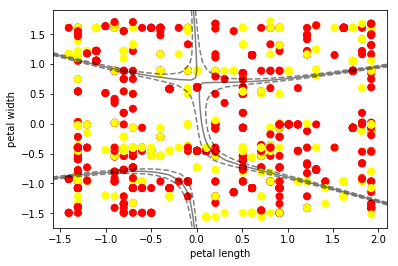

CPU times: user 706 ms, sys: 158 ms, total: 864 ms
Wall time: 297 ms


In [17]:
%%time
svm = SVC(kernel='sigmoid')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')   
plt.show()

In [30]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,0.1,0.408943,0.073308,-0.001418,-0.007122,7
1,0.1,1,0.371153,0.063224,-0.001418,-0.007122,7
2,0.1,10,0.380010,0.067688,-0.001418,-0.007122,7
3,1,0.1,0.838348,0.069618,-0.001430,-0.007111,4
4,1,1,0.834131,0.074970,-0.001430,-0.007111,4
5,1,10,0.837196,0.071698,-0.001430,-0.007111,4
6,10,0.1,4.277758,0.068135,-0.001430,-0.007104,1
7,10,1,4.218525,0.070355,-0.001430,-0.007104,1
8,10,10,4.168367,0.069010,-0.001430,-0.007104,1


In [18]:
corrmatrix = df.corr()
corrmatrix.head()

,Sex,Age,Height,Weight,Team,Sport,Medal
Sex,1.000000,0.104655,0.526194,0.526621,-0.006151,-0.004610,0.004700
Age,0.104655,1.000000,0.111014,0.144276,0.023701,-0.059851,0.002197
Height,0.526194,0.111014,1.000000,0.780833,0.002210,0.073601,-0.031172
Weight,0.526621,0.144276,0.780833,1.000000,0.003312,0.138186,-0.036409
Team,-0.006151,0.023701,0.002210,0.003312,1.000000,-0.007023,-0.012587


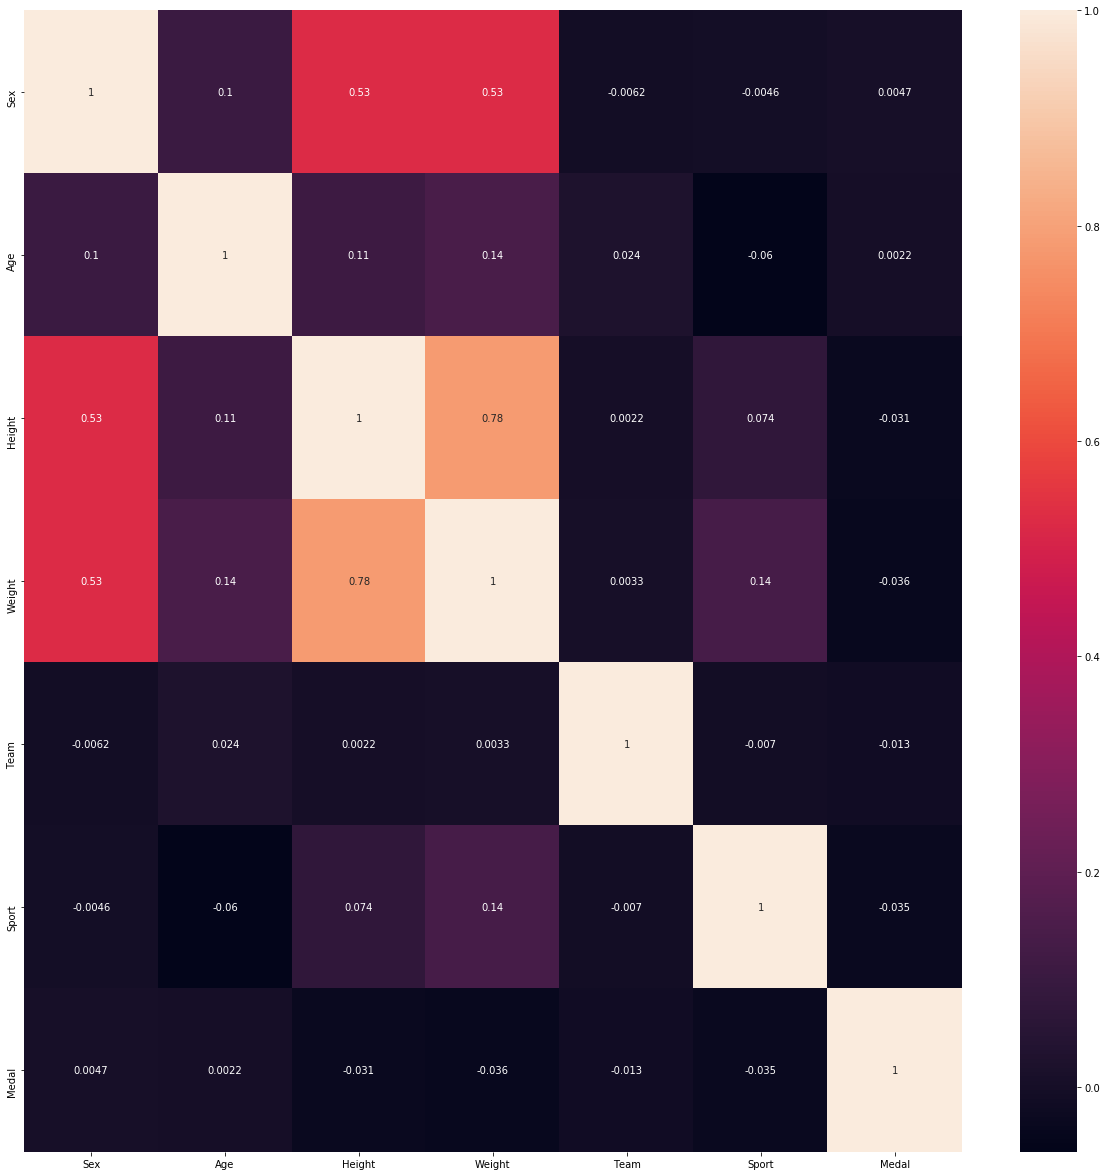

In [19]:
f = plt.subplots(figsize=(21,21))
sb.heatmap(corrmatrix, annot=True)

In [22]:
x = df[['Weight']].values
y = df['Sex'].values

print(x[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

[[-1.08233807]
 [-1.08233807]
 [-0.31515645]
 [-1.01840626]
 [ 1.02741139]
 [ 2.81750183]
 [-1.01840626]
 [-0.05942924]
 [-0.05942924]
 [ 0.38809337]]
[-1.09613658 -1.09613658  0.91229507 -1.09613658  0.91229507 -1.09613658
  0.91229507 -1.09613658 -1.09613658  0.91229507]


In [21]:
%%time
svm = SVR(kernel='linear')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: 0.225
CPU times: user 2.41 s, sys: 87.8 ms, total: 2.5 s
Wall time: 2.5 s


In [31]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,0.253256,0.043478,-0.001431,-0.007120,3
1,1,0.314786,0.043536,-0.001430,-0.007119,2
2,10,2.168983,0.043008,-0.001441,-0.007117,1


In [18]:
%%time
svm = SVR(kernel='poly')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: -0.120
CPU times: user 14.3 s, sys: 93.8 ms, total: 14.4 s
Wall time: 14.4 s


In [ ]:
# grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
# grid.fit(x_std, y)
# grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
# grid_data.head(10)

In [33]:
%%time
svm = SVR(kernel='rbf')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: 0.623
CPU times: user 2.68 s, sys: 82.4 ms, total: 2.77 s
Wall time: 2.77 s


In [32]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,0.1,0.259153,0.047442,-0.001431,-0.007120,7
1,0.1,1,0.262051,0.046591,-0.001431,-0.007120,7
2,0.1,10,0.271425,0.046353,-0.001431,-0.007120,7
3,1,0.1,0.333771,0.046775,-0.001430,-0.007119,4
4,1,1,0.325004,0.045221,-0.001430,-0.007119,4
5,1,10,0.321385,0.045088,-0.001430,-0.007119,4
6,10,0.1,2.278831,0.045487,-0.001441,-0.007117,1
7,10,1,2.296432,0.048143,-0.001441,-0.007117,1
8,10,10,2.218436,0.043548,-0.001441,-0.007117,1


In [25]:
%%time
svm = SVR(kernel='sigmoid')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: -216334.732
CPU times: user 3.64 s, sys: 85.3 ms, total: 3.72 s
Wall time: 3.73 s


In [33]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,0.1,0.255705,0.043145,-0.001431,-0.007120,7
1,0.1,1,0.253414,0.043407,-0.001431,-0.007120,7
2,0.1,10,0.246779,0.043332,-0.001431,-0.007120,7
3,1,0.1,0.314860,0.043360,-0.001430,-0.007119,4
4,1,1,0.311629,0.043882,-0.001430,-0.007119,4
5,1,10,0.313368,0.046766,-0.001430,-0.007119,4
6,10,0.1,616.156062,0.043523,-0.001441,-0.007117,1
7,10,1,4.265655,0.097437,-0.001441,-0.007117,1
8,10,10,6.772794,0.149845,-0.001441,-0.007117,1


In [26]:
x = df.iloc[:, :-1]
y = df['Medal'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [26]:
%%time
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: 0.849
CPU times: user 535 ms, sys: 19.7 ms, total: 555 ms
Wall time: 557 ms


In [27]:
%%time
svm = SVR(kernel='linear')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: -0.000
CPU times: user 837 ms, sys: 16.9 ms, total: 854 ms
Wall time: 853 ms
